# Figures for public outreach talk on Paleoceanography - Part 1: Intro to Paleoclimatology
_07/2022_



In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

mpl.style.use('default')

mpl.rc('font', family='serif') 
mpl.rc('font', serif='Playfair') 
mpl.rc('text', usetex='true') 
mpl.rc('axes',linewidth=0.8)

mpl.rcParams.update({'font.size': 12})

## HADCRUT Temperature Series
HadCRUT5 is a gridded dataset of global historical surface temperature anomalies relative to a 1961-1990 reference period. Data is accessed from https://www.metoffice.gov.uk/hadobs/hadcrut5/ and the global average temperature from the median of 100 ensembles is plotted.

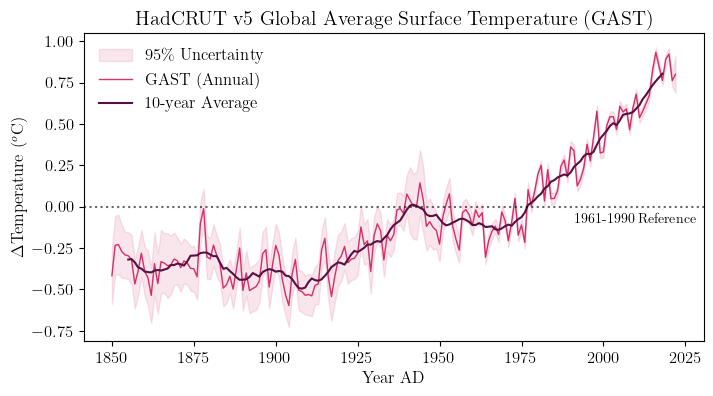

In [2]:
# hadcrut_ann = pd.read_csv('data/HadCRUT.5.0.1.0.analysis.summary_series.global.annual.csv')
hadcrut_ann['dec'] = hadcrut_ann['Anomaly (deg C)'].rolling(10,center=True).mean() # find rolling decadal mean

color = 'xkcd:ruby'
f,ax = plt.subplots(1,1,figsize=(8,4))
ax.fill_between(hadcrut_ann['Time'],hadcrut_ann['Lower confidence limit (2.5%)'],hadcrut_ann['Upper confidence limit (97.5%)'],fc='k',alpha=0.1,color=color,label='95\% Uncertainty')
ax.plot(hadcrut_ann['Time'],hadcrut_ann['Anomaly (deg C)'],color=color,lw=1,alpha=0.8,label='GAST (Annual)')
ax.plot(hadcrut_ann['Time'],hadcrut_ann['dec'],color='xkcd:plum',lw=1.5,label='10-year Average')
ax.legend(facecolor='none',frameon=False)

ax.axhline(0,linestyle=':',color='k',alpha=0.6)
ax.text(2010,-0.1,'1961-1990 Reference',fontsize=10,ha='center')


ax.set_title('HadCRUT v5 Global Average Surface Temperature (GAST)')
ax.set_ylabel('$\Delta$Temperature ($^o$C)')
ax.set_xlabel('Year AD')
plt.savefig('figures/HadCRUT_gast.png',transparent=True,dpi=500)

## Common Era
CE temperature reconstruction from the Pages2k consortium. Data from https://www.nature.com/articles/sdata201788

In [95]:
# pages2k = pd.read_csv('data/PAGES2k_1_2000.csv')
# pages2k_hadcrut = pd.read_csv('data/PAGES2k_1850_2020.csv')

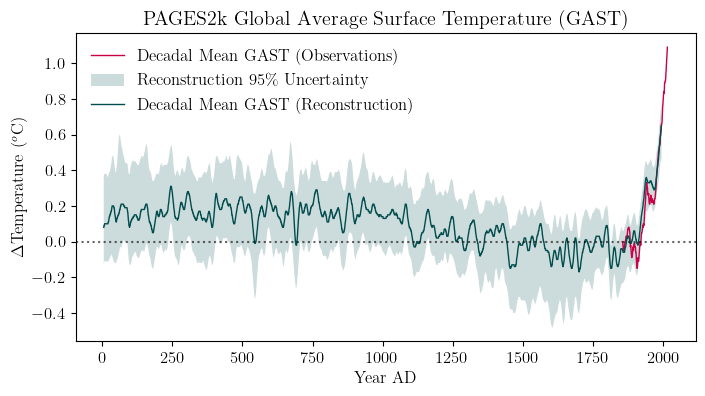

In [4]:
had_color = 'xkcd:ruby'
ce_color = 'xkcd:dark teal'

f,ax = plt.subplots(1,1,figsize=(8,4))
ax.plot(pages2k_hadcrut['year'],pages2k_hadcrut['temp'],color='xkcd:ruby',lw=1,label='Decadal Mean GAST (Observations)')

ax.fill_between(pages2k['year'],pages2k['5%'],pages2k['95%'],fc=ce_color,alpha=0.2,label='Reconstruction 95\% Uncertainty')
ax.plot(pages2k['year'],pages2k['temp'],c=ce_color,lw=1,label='Decadal Mean GAST (Reconstruction)')



ax.axhline(0,linestyle=':',color='k',alpha=0.6)
ax.legend(frameon=False)

ax.set_title('PAGES2k Global Average Surface Temperature (GAST)')
ax.set_ylabel('$\Delta$Temperature ($^o$C)')
ax.set_xlabel('Year AD')
plt.savefig('figures/PAGES2k.png',transparent=True,dpi=500)

## Holocene
Marcott et al., 2013 Science Holocene temperature database. Access here https://www.science.org/doi/10.1126/science.1228026


In [94]:
#holo = pd.read_excel('data/marcott.sm.database.s1.xlsx',2,header=2)


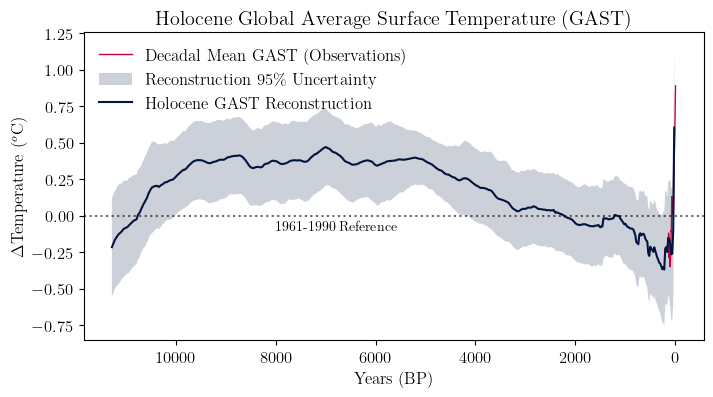

In [6]:
had_color = 'xkcd:ruby'
ce_color = 'xkcd:dark teal'
ho_color = 'xkcd:navy'

f,ax = plt.subplots(1,1,figsize=(8,4))
ax.plot(2000-pages2k_hadcrut['year'],pages2k_hadcrut['temp']-0.2,color='xkcd:ruby',lw=1,label='Decadal Mean GAST (Observations)')

# multiply 1sigma boudns by 1.96 to estimate 95% uncertainty (for consistency with previous figure)
ax.fill_between(holo['Age (yrs BP)'],holo['Global (°C)']-(holo['1σ uncertainty (°C)']*1.96),holo['Global (°C)']+(holo['1σ uncertainty (°C)'])*1.96,alpha=0.2,fc=ho_color,label='Reconstruction 95\% Uncertainty')
ax.plot(holo['Age (yrs BP)'],holo['Global (°C)'],color=ho_color,label='Holocene GAST Reconstruction')


ax.axhline(0,linestyle=':',color='k',alpha=0.6)
ax.text(8000,-0.1,'1961-1990 Reference',fontsize=10)
ax.legend(frameon=False)

ax.invert_xaxis()
ax.set_title('Holocene Global Average Surface Temperature (GAST)')
ax.set_ylabel('$\Delta$Temperature ($^o$C)')
ax.set_xlabel('Years (BP)')
plt.savefig('figures/Holocene.png',transparent=True,dpi=500)



## Comapre CO2 observations to ice core CO2
- Observational CO2 record can be accesses through NOAA at https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_gl.csv
- Antarctic ice core CO2 composite record from Bereiter et al., 2015 which can be accessed here https://cdiac.ess-dive.lbl.gov/trends/co2/ice_core_co2.html




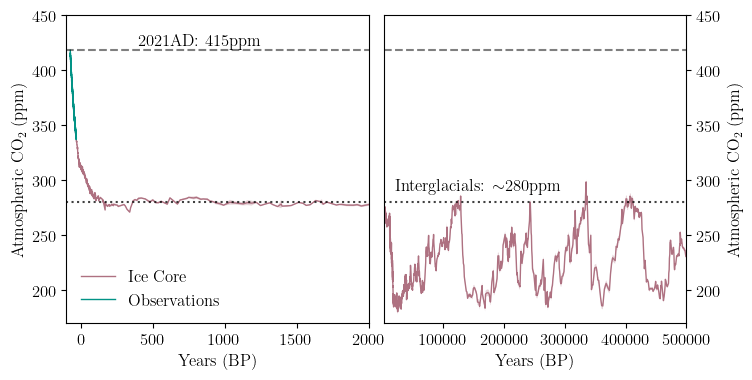

In [93]:
# obs_co2 = pd.read_csv('https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_gl.csv',header=56)
# co2 = pd.read_csv('data/antarctica2015co2composite.txt',header=137,sep='\t')


had_color = 'xkcd:ruby'
ce_color = 'xkcd:dark teal'
ho_color = 'xkcd:navy'

f,ax = plt.subplots(1,2,figsize=(8,4))

for a in ax:
    a.fill_between(co2['age_gas_calBP'],co2['co2_ppm']-co2['co2_1s_ppm'],co2['co2_ppm']+co2['co2_1s_ppm'],fc='xkcd:mauve',alpha=0.3)
    a.plot(co2['age_gas_calBP'],co2['co2_ppm'],color='xkcd:mauve',lw=1,label='Ice Core')

ax[0].plot(((obs_co2['decimal']-1950))*-1,obs_co2['average'],lw=1,color='xkcd:teal',label='Observations')
ax[0].set_xlim(-100,2000)
ax[1].set_xlim(2000,500000)

ax[0].set_ylabel('Atmospheric CO$_2$ (ppm)')
ax[1].set_ylabel('Atmospheric CO$_2$ (ppm)')

for a in ax:
    a.set_xlabel('Years (BP)')
    a.set_ylim(170,450)
    a.axhline(obs_co2['average'].max(),linestyle='--',color='k',alpha=0.5)
    a.axhline(280,linestyle=':',color='k',alpha=0.75,lw=1.5)


ax[0].text(400,422,'2021AD: 415ppm')
ax[1].text(20000,290,'Interglacials: $\sim$280ppm')

ax[1].yaxis.set_ticks_position('right')
ax[1].yaxis.set_label_position('right')

plt.subplots_adjust(wspace=0.05)
ax[0].legend(frameon=False)

plt.savefig('figures/broken_co2.png',transparent=True,dpi=500)
